In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/NLP DATASETS/robert_frost.txt') as story:
  story_data = story.read()

print(story_data)

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference.

Whose woods these are I think I know.   
His house is in the village though;   
He will not see me stopping here   
To watch his woods fill up with snow.   

My little horse must think it queer   
To stop without a farmhouse near   
Between the woods and frozen lake   

In [ ]:
import re

In [ ]:
def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text


In [ ]:
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)

final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)

['two roads diverged in a yellow wood,', 'and sorry i could not travel both', 'and be one traveler, long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth;', '', 'then took the other, as just as fair,', 'and having perhaps the better claim,', 'because it was grassy and wanted wear;', 'though as for that the passing there', 'had worn them really about the same,', '', 'and both that morning equally lay', 'in leaves no step had trodden black.', 'oh, i kept the first for another day!', 'yet knowing how way leads on to way,', 'i doubted if i should ever come back.', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence:', 'two roads diverged in a wood, and i—', 'i took the one less traveled by,', 'and that has made all the difference.', '', 'whose woods these are i think i know.   ', 'his house is in the village though;   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow.   ', '', 'my little horse must t

In [ ]:
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'two roads diverged in a yellow wood', 'and sorry i could not travel both', 'and be one traveler long i stood', 'and looked down one as far as i could', 'to where it bent in the undergrowth', '', 'then took the other as just as fair', 'and having perhaps the better claim', 'because it was grassy and wanted wear', 'though as for that the passing there', 'had worn them really about the same', '', 'and both that morning equally lay', 'in leaves no step had trodden black', 'oh i kept the first for another day!', 'yet knowing how way leads on to way', 'i doubted if i should ever come back', '', 'i shall be telling this with a sigh', 'somewhere ages and ages hence', 'two roads diverged in a wood and i—', 'i took the one less traveled by', 'and that has made all the difference', '', 'whose woods these are i think i know   ', 'his house is in the village though   ', 'he will not see me stopping here   ', 'to watch his woods fill up with snow   ', '', 'my little horse must think it queer  

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

In [ ]:
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

544
{'the': 1, 'to': 2, 'and': 3, 'i': 4, 'a': 5, 'of': 6, 'in': 7, 'he': 8, 'it': 9, 'was': 10, 'them': 11, 'not': 12, 'one': 13, 'as': 14, 'could': 15, 'for': 16, 'be': 17, 'that': 18, 'with': 19, 'by': 20, 'but': 21, 'trees': 22, 'so': 23, 'had': 24, 'you': 25, 'they': 26, 'there': 27, 'on': 28, 'all': 29, 'his': 30, 'some': 31, 'have': 32, 'like': 33, 'too': 34, 'down': 35, 'where': 36, 'then': 37, 'come': 38, 'me': 39, 'go': 40, 'their': 41, 'over': 42, 'would': 43, 'christmas': 44, 'if': 45, 'woods': 46, 'are': 47, 'wind': 48, 'away': 49, 'out': 50, 'from': 51, 'what': 52, 'its': 53, 'took': 54, 'no': 55, 'yet': 56, 'should': 57, 'back': 58, 'think': 59, 'know': 60, 'is': 61, 'see': 62, 'my': 63, 'before': 64, 'when': 65, 'left': 66, 'right': 67, 'do': 68, 'going': 69, 'or': 70, 'id': 71, 'place': 72, 'enough': 73, 'thousand': 74, 'wood': 75, 'both': 76, 'long': 77, 'other': 78, 'having': 79, 'though': 80, 'about': 81, 'way': 82, 'up': 83, 'little': 84, 'must': 85, 'birches': 86,

In [ ]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[112, 113], [112, 113, 114], [112, 113, 114, 7], [112, 113, 114, 7, 5], [112, 113, 114, 7, 5, 190], [112, 113, 114, 7, 5, 190, 75], [3, 191], [3, 191, 4], [3, 191, 4, 15], [3, 191, 4, 15, 12], [3, 191, 4, 15, 12, 192], [3, 191, 4, 15, 12, 192, 76], [3, 17], [3, 17, 13], [3, 17, 13, 193], [3, 17, 13, 193, 77], [3, 17, 13, 193, 77, 4], [3, 17, 13, 193, 77, 4, 194], [3, 115], [3, 115, 35], [3, 115, 35, 13], [3, 115, 35, 13, 14], [3, 115, 35, 13, 14, 116], [3, 115, 35, 13, 14, 116, 14], [3, 115, 35, 13, 14, 116, 14, 4], [3, 115, 35, 13, 14, 116, 14, 4, 15], [2, 36], [2, 36, 9], [2, 36, 9, 195], [2, 36, 9, 195, 7], [2, 36, 9, 195, 7, 1], [2, 36, 9, 195, 7, 1, 196], [37, 54], [37, 54, 1], [37, 54, 1, 78], [37, 54, 1, 78, 14], [37, 54, 1, 78, 14, 197], [37, 54, 1, 78, 14, 197, 14], [37, 54, 1, 78, 14, 197, 14, 198], [3, 79], [3, 79, 199], [3, 79, 199, 1], [3, 79, 199, 1, 117], [3, 79, 199, 1, 117, 200], [201, 9], [201, 9, 10], [201, 9, 10, 202], [201, 9, 10, 202, 3], [201, 9, 10, 202, 3, 203

In [ ]:
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

11


In [ ]:
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

[[  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 [  0   0   0 ... 113 114   7]
 ...
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]
 [  0   0   0 ...   5 544  44]]


In [ ]:
xs = input_seq[:,  :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[  0   0   0 ...   0   0 112]
 [  0   0   0 ...   0 112 113]
 [  0   0   0 ... 112 113 114]
 ...
 [  0   0   0 ... 189  25 543]
 [  0   0   0 ...  25 543   5]
 [  0   0   0 ... 543   5 544]]
labels: [113 114   7 ...   5 544  44]


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [ ]:
i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])
# Changed 'lr' to 'learning_rate' in the Adam optimizer initialization.

In [ ]:
r = model.fit(xs,ys,epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.0344 - loss: 6.1733
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0372 - loss: 5.7712
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0482 - loss: 5.6786
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0306 - loss: 5.7357
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0425 - loss: 5.6231
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0324 - loss: 5.6592
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0484 - loss: 5.4157
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0509 - loss: 5.3475
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0536 - loss: 5.2057
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0648 - loss: 4.9528
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0790 - loss: 4.6943
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

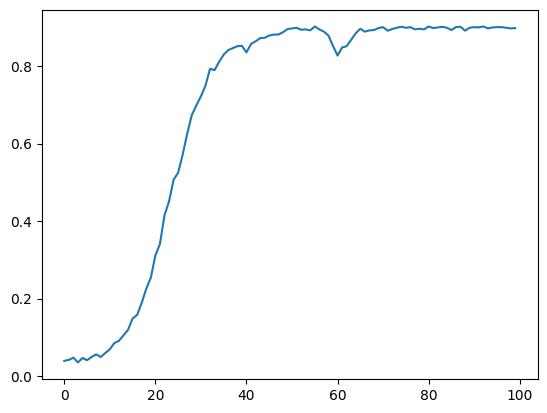

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [ ]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [ ]:
seed_text = 'i am feeling good today'
next_words = 20

predict_words(seed_text, next_words)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
i am feeling good today birches bend to left and right there his thousand trees there again christmas trees trees again again trees over i
